# Bank marketing campaigns dataset | Opening Deposit

**About the dataset**

This dataset is from UCI Machine Learning Respository's Bank Marketing Data Set. 
Feel free to explore the link here: (https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)

This data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution with the classification goal to predict if the client will subscribe to a term deposit.

The marketing campaigns were based on phone calls. Often times, more than one call was required to a client if client would subscribe or not subscribe to the client. 

# Term deposit

**What is Term Deposit?**

Term deposit is deposit account where money is locked up for some period of time, which ranges from few months to years. However, as a tradeoff to money being locked up, term deposit offers higher interest rate than traditional, liquid savings accounts. Early termination (withdrawl of money) is often associated with penalties.

It is also known as **certificate of deposit** in the United States.

You can read more about term deposit if you are interested:
- Investopedia article: https://www.investopedia.com/terms/t/termdeposit.asp
- Wikipedia article: https://en.wikipedia.org/wiki/Time_deposit#:~:text=A%20time%20deposit%20or%20term,to%20as%20its%20%E2%80%9Cterm%E2%80%9D.


# Assessing marketing campaigns

**Conversion and Retention**

Most widely used metrics to measure the success of a marketing campaigns are **conversion rate** and **retention rate**. 

*Conversion rate* answers the question, "Are we good at making new customers (or subscribers in this case)?" by calculating the propportion of prospects (of a marketing campaign) that became a customer. *Retention rate* answers the question, "Are we good at keeping our current customers?", by calculating the proportion of existing customers (of a marketing campaign) that has stayed as customers after a given time. 

For the context of analyzing this dataset, we will be observing the conversion rate across clients with differnt attributes, and retention rate is not relevant to the analysis. However, it is a good concept to be aware of.

**Segmentation**

Segementation is a process of separating your audience into groups based on shared attribute(s), and marketing campaigns utilize them to make their messages resonate more with their target audience. Let's say you are running a marketing agency and that sent an email campaign for advertising life insurance policies. Would you expect the same or different levels of response from people in their 20s and 60s? Answer is most likely the latter.

Attributes used to segment audience or customers vary widely. They may include demographic information like age and gender and/or lifestyle traits and even past behaviors. For companies, segmentation also help companies to have deeper understanding of their audience or determine the most effective channel of communication.

This also means that effectiveness of any marketing campaigns should be evaluated separately on segment of audience/customer rather than calcaulting a single conversion rate or retention rate for the campaign. 

I have listed additional articles below if you are interested this topic.
* HubSpot Article: https://blog.hubspot.com/marketing/segmentation-targeting-positioning
* Wikipedia: https://en.wikipedia.org/wiki/Market_segmentation


# Outline of Approach:

- Acquire dataset (import .csv file)
- Data exploration (interpret each variables - target and feature) 
- Data manipulation (data correction, cleaning, imputing (if necessary))
- Variable Analysis (assess distribution, conversion rate (predictive value) for numerical and categorical variables)
- Multi-variable Analysis (assess conversion rate for 2-layer client segments)
- Application: Personas (hypothesize on possible buyer personas for the term deposit customers)
- For Fun: Brief look at classification models (Train limited set of models and tune few hyperparameters for **fun**)

# Acquire data

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind 

In [ ]:
# read the .csv file
df = pd.read_csv('../input/bank-marketing-dataset/bank.csv')

In [ ]:
# print out the shape
row = df.shape[0]
col = df.shape[1]
print('There are {} rows and {} columns in this dataset'.format(row, col))

In [ ]:
# print first 5 rows
df.head()

Takeaway:
- Dataset has been imported without error with appropirate column headers. No additional work needed 

# Data Exploration

Before further exploring the data, it is crucial to recognize what each attribute (should) represent.

Below is attribute information provided by UCI Machine Learning Repository:

***Input variables:***

**1. Attributes on bank client data:**
* age: (numeric)
* job: type of job (categorical)
* marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* education: (categorical)
* default: has credit in default? (categorical: 'no','yes','unknown')
* housing: has housing loan? (categorical: 'no','yes','unknown')
* loan: has personal loan? (categorical: 'no','yes','unknown')
* balance: deposit amount (numeric)

**2. Attributes related with the last contact of the current campaign:**
- contact: contact communication type (categorical: 'cellular','telephone')
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- day: last contact day (numeric)
- duration: last contact duration, in seconds (numeric). 
    - Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'), Yet, the duration is not known before a call is performed. 
    - Also, after the end of the call, y is obviously known. 
    - Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
    
***3. Other attributes:***
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric)
    - website tells that 999 means client was not previously contacted, but for this dataset, the value is -1
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

***4. Output variable (desired target for classficiation task):***
- deposit: has the client subscribed a term deposit? (binary: 'yes','no')

In [ ]:
df.info() # print columns and their data types

Takeaway:
- There are no null values for all columns. However, this does not mean that there are no invalid data.
- Some columns may need to be converted into boolean values (Ex. default, housing)




In [ ]:
df.describe()

Takeaway:
* There are no sign of obvious outliers from the initial look through

# Data Manipulation

In [ ]:
# 'duration' attribute highly affects the output target and is unknown until the end of the call. Therefore, it is to be dropped.
df.drop(columns = ['duration'], inplace=True)

In [ ]:
# Printing unique values of categorical columns 
cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']
for col in cols:
    print('There are {} unique values in column, "{}"'.format(df[col].nunique(), col))
    print('Unique values of column, "{}": {}'.format(col, df[col].unique()))

In [ ]:
# Countplot for categorical columns
cat_col = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']

sns.set_theme()
fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(15, 50))
fig.subplots_adjust(hspace=.5)
plt.title('Countplot for categorical variables')

for i, col in enumerate(cat_col):
    sns.countplot(y=col, data=df, ax = ax[i])
    ax[i].set_title('count of {}'.format(col))

Takeaway:
* job column: job column contains not only the category but also the status of employement. It may be is worthwhile to separate them.
* 'month' column: december and may had especially low and high counts, respectively. 
* 'default', 'housing' and 'loan' ,'deposit' columns are useful columns to be converted to a dummary variable that only contains 0 or 1 as possible values.

In [ ]:
# Convert yes/no to binary variables (1,0) 
binary_col = ['default', 'housing', 'loan', 'deposit']
dict = {'yes':1, 'no':0}

for col in binary_col:
    binary = df[col].map(dict)
    df[col] = binary

In [ ]:
# distribution of numerical attributes
num_col = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous'] # numeric columns

fig, ax = plt.subplots(nrows=6, ncols=1, figsize=(15, 45)) # create subplots
fig.subplots_adjust(hspace=.5) # adjust space between plots

for i, col in enumerate(num_col):
    sns.boxplot(x=df[col], ax=ax[i])
    ax[i].set_title('Distribution of {}'.format(col))

Takeaway:
* 'age' column: most of age value is distributed under 75 with median value at mid 30s.
* 'balance' column: balance varied widely, but most of the value was concentrated near 0.
* 'pdays' column: number of days passed since the last marketing campaign seem to be around 0
* 'previous' column: mostly zero contacts were made previous to this marketing campaign.

# Variable analysis 

I will be evaluating the conversion rates of differnt segments that can be generated by given attributes.

Categorical columns are: 
* 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit'

Numeric columns are: 
* 'age', 'balance', 'duration', 'campaign', 'pdays' and 'previous'



In [ ]:
# function to segment and calculate proportion of deposit = 1
def groupby_deposit(col_list):
    return df.groupby(col_list)['deposit'].mean()

# funciton to plot conversion rate of attribute segments
def one_col_conv_rate(col):
    sns.set_theme()
    data = groupby_deposit(col).to_frame().reset_index()
    plt.figure(figsize=(14,6))
    ax = sns.barplot(x=data['deposit'],\
                  y=data[col].astype('category'),\
                      ci=95)
    ax.yaxis.grid(True)
    plt.title('Conversion rates for "{}" attribute client segments'.format(col))
    plt.xlabel('Marketing campaign conversion rate (1=100%)')   
    plt.xlim((0,1))

# function to plot conversion rate for 2-attribute segments
def two_col_conv_rate(col_list):
    sns.set_theme()
    data = groupby_deposit(col_list).to_frame().reset_index()
    plt.figure(figsize=(14,6))
    ax = sns.pointplot(x=data['deposit'],\
                  y=data[col_list[0]].astype('category'),\
                  hue=data[col_list[1]].astype('category'),\
                  join=False)
    ax.yaxis.grid(True)
    plt.title('Conversion rates for {}-{} client segments'.format(col_list[0], col_list[1]))
    plt.xlabel('Marketing campaign conversion rate (1=100%)')
    plt.xlim((0,1))


**Categorical Features**

Categorical columns are: 
* 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'

In [ ]:
# Job
one_col_conv_rate('job')

Takeaway:
* Retired and student clients had the highest conversion rate
    * One can hypothesize the reason as that their expenditures are mostly 'flat' without heavy fluctuations. 
    * Retirees have retirement funds to work with while students often have living expense and tuition to worry about. 
* Clients with occupations of Blue-collar, entreprenuer, service, housemaid and service had low conversion rate
    * One can hypothesize that these jobs are typically not high-paying and those with low paying jobs are less likely to have liquidity
    * Entreprenurs have low rate of success in general (80% fail in 5 years) and they are often low on runway 

In [ ]:
# Marital
one_col_conv_rate('marital')

Takeaway:
* Married clients are less likely to open a deposit
    * Married clients are more likely to have children, which are big financial investments. This also means that they are less likely to have liquidity 

In [ ]:
# Education`
one_col_conv_rate('education')

Takeaway:
* Greater the level of education, higher the likelihood of conversion was
    * Hypothesis: those with more education may get paid more and therefore better off, leaving them with more fund they are comfortable with being "locked up" at the expense of higher interest rate 

In [ ]:
# Default
one_col_conv_rate('default')

Takeaway:
* Those with default experiences are less likely to have money in hand that they are comfortable 'locking up' for few months/years

In [ ]:
# housing
one_col_conv_rate('housing')

In [ ]:
# loan
one_col_conv_rate('loan')

Takeaway:
* Ones with any kind of loans had lower conversion rate
    * Those with any kind of loan (housing or personal) are less likely to have cash they are comfortable 'locking up' for some period of time

In [ ]:
# contact
one_col_conv_rate('contact')

In [ ]:
# Validate whether 'celluar' and 'telephone' contact method have different conversion rate
df1 = df[df['contact'] == 'cellular']['deposit']
df2 = df[df['contact'] == 'telephone']['deposit']
pval = ttest_ind(df1, df2).pvalue

print('Chance of "cellular" and "telephone" having a same value: {}%'.format(round(pval*100, 4)))

Takeaway

* Clients contacted with 'cellular' phone have higher chance of conversion than those contacted with 'telphone'
     * Is this because younger people are more likely to have cellphone than older population?

In [ ]:
# month
one_col_conv_rate('month')

Takeaway:
* There are many seasonal industries/business, and opening up deposit may be one of them
* month of december, march, september and october had the higher conversion rate than other months

In [ ]:
# poutcome
one_col_conv_rate('poutcome')

In [ ]:
# Validate whether past failure/success of marketing campaign results in statistically significant difference in ongoing marketing campaign conversion rate
poutcome_failure = df[df['poutcome'] == 'failure']['deposit']
poutcome_success = df[df['poutcome'] == 'success']['deposit']
pval = ttest_ind(poutcome_failure, poutcome_success).pvalue

print('Chance of "failure" and "success" having a same value: {}%'.format(round(pval*100, 4)))

Takeaway:

* Previous sucess in marketing campaign results in higher conversion rate that is statistically significant enough

**Numeric features**

Numeric features include:
* 'age', 'balance', 'campaign', 'pdays' and 'previous'

In [ ]:
# Heatmap of numeric features
df_num = df[['age', 'balance', 'campaign', 'pdays', 'previous', 'deposit']]
plt.figure(figsize=(14,6))
sns.heatmap(df_num.corr(), annot=True)

Takeaway:
* Note: correlation between variables does not imply causation between them
* Note: low correlation does not necessarily mean that there are no relationship between variables. It may not be strictly linear
* Campaign (number of contacts performed during this campaign) and deposit have mild, negative correlation
* pdays and previous are strongly correlated as they both pertain to previous campaign experience. 
    * pdays : (number of days that passed since last contact in previous campaign)
    * previous : (number of contacts performed before this campaign)
* pdays and previous both have mild, postivie correalation with deposit
    * Note that values for contacts without previous campaign are -1
    * This likely suggest that deposit value is higher for those with contacts from previous campaign
* we may only use one of two columns, pdays and previous, for the fitting the model due to multi-coliniarity, but it is unsure at this point 

In [ ]:
# function to plot empiricial cumulative distribution function
def plot_ecdf(data, col):
    x = np.sort(data[col])
    y = np.sort(np.arange(1, len(data[col])+1)/(len(data[col])+1))
    x_norm = np.sort(np.random.normal(data[col].mean(), data[col].std(), len(data[col])))

    plt.figure(figsize=(16,8))
    ax = sns.scatterplot(x=x, y=y, label=col, edgecolors=None, linewidth=0, alpha=0.5)
    sns.scatterplot(x=x_norm, y=y, label='Normal Distribution', ax=ax, edgecolors=None, linewidth=0, alpha=0.5)
    plt.title('ECDF of {}'.format(col))
    plt.ylabel('Probability')

In [ ]:
# Age column 
# this is too-micro, and  but it is to help us where the inflection points are
yearly_conv_rate = df.groupby('age')['deposit'].mean().to_frame().reset_index() # conversion rate by age
plt.figure(figsize=(16,8))
ax = sns.lineplot(x='age', y='deposit', data=yearly_conv_rate)
plt.title('Conversion rate by age')
plt.xlabel('Age')
plt.ylabel('Conversion rate (1=100%)')
ax.axvline(30, linestyle = '--')
ax.axvline(60, linestyle = '--')

Takeaway:
* Those under 30 and over 60 are much more likely to open a deposit from this marketing campaign
    * Why is this? 
    * Hypothesis 1. While age of 30 to 60 are in prime working age, they are ones who are most likely to spend lot of money (Child, housing, etc.) and therefore are low on equity
    * Hypothesis 2. Those in the age bracket of 30-60 tend to have consistent source of income for stability and therefore are more intereseted in riskier investment options wiht greater returns (ex. stocks)
    

In [ ]:
# Create age grouping at 30 and 60
df.loc[:, 'age_group'] = '<30'
df.loc[(df['age'] >= 30)&(df['age'] < 60), 'age_group'] = '30-60'
df.loc[(df['age'] >= 60),'age_group'] = '>60'

In [ ]:
# Count the number of clients in each of age_groups
df.value_counts('age_group')

In [ ]:
# See the conversion rate by age_group
one_col_conv_rate('age_group')

In [ ]:
# Balance
plot_ecdf(df, 'balance')

In [ ]:
# Create numeric groupings for balance
df.loc[:,'balance_group'] = '<0'
df.loc[(df['balance'] >= 0)&(df['balance'] < 1000), 'balance_group'] = '0-1000'
df.loc[(df['balance'] >= 1000)&(df['balance'] < 2500), 'balance_group'] = '1000-2500'
df.loc[(df['balance'] >= 2500), 'balance_group'] = '2500+'

In [ ]:
# visualize conversion rate
one_col_conv_rate('balance_group')

Takeaway
* More money the client has in balance (deposit amount), greater the chance of conversion is
    * I hypothesize that the the more money the client have in account, there is a smaller chance of client needing to use or move large portion of the deposit in near future. In that case, term deposit which trades liquidity with extra earning sounds more attractive. 

In [ ]:
# validate that there is enough sample for each groupings
df.value_counts('balance_group').to_frame().sort_values('balance_group')

In [ ]:
# Balance
plot_ecdf(df, 'campaign')

Takeaway:

* Most of the people were contacted either 1, 2 or 3 times, and there are increasingly smaller subset of people who got contacted higher number of times

In [ ]:
# Conversion rate by number of contacts in campaign
# this is too-micro, and  but it is to help us where the inflection points are
df_campaign = df[df['campaign'] <= 10]
campaign_conv_rate = df_campaign.groupby('campaign')['deposit'].mean().to_frame().reset_index() # conversion rate by campaign
plt.figure(figsize=(16,8))
ax = sns.lineplot(x='campaign', y='deposit', data=campaign_conv_rate)
plt.title('Conversion rate by number of contacts in the campaign')
plt.xlabel('Number of contacts to client during the campaign')
plt.ylabel('Conversion rate (1=100%)')
plt.xticks(np.arange(1, 11))
ax.axvline(2, linestyle = '--')
ax.axvline(3, linestyle = '--')
ax.axvline(7, linestyle = '--')

Takeaway:
* Additional contacts beyond the first diminishes the conversion rate
    * It is true that some may need more than 1 contacts to complete the process, as metioned in the beginning
* The number of contacts which the conversion ratio diminishes greatly begins after the 3rd call
* The number of contacts which the conversion ratio diminishes even more so greatly begins after the 7th call, but it may be due to low sample size

In [ ]:
# assign categorical data for grouping contacts during campaign
df.loc[:,'campaign_group'] = ''
df.loc[df['campaign'] == 1, 'campaign_group'] = '1'
df.loc[(df['campaign'] == 2) | (df['campaign'] == 3), 'campaign_group'] = '2-3'
df.loc[(df['campaign'] > 3) & (df['campaign'] <= 7), 'campaign_group'] = '4-7'
df.loc[(df['campaign'] > 7), 'campaign_group'] = '7+'

In [ ]:
# plot conversion rate by groups
one_col_conv_rate('campaign_group')

In [ ]:
# validate diminishing conversion rate by number of calls
camp_1 = df[df['campaign'] == 1]
camp_23 = df[(df['campaign'] == 2)|(df['campaign'] == 3)]
pval = ttest_ind(camp_1['deposit'], camp_23['deposit']).pvalue

print('Chance of campaign = 1 and campaign = (2 or 3) having a same converion rate: {}%'.format(round(pval*100, 4)))

In [ ]:
# pdays : ECDF
plot_ecdf(df, 'pdays')

Most of the value is -1. Lets plot a different ecdf which excludes the rows where 'pdays'=-1

In [ ]:
# exclude -1
plot_ecdf(df[df['pdays'] >= 0], 'pdays')

Takeaway:
* Distribution of days passed since the client was last contacted was not normal, which suggest that there were bulk of clients contacted with previous marketing campaign and rests in between

In [ ]:
# label pdays into groups
df.loc[:,'pdays_group'] = 4 
df.loc[~(df['pdays']== -1),'pdays_group'] = pd.qcut(df.loc[~(df['pdays'] == -1), 'pdays'], 4, labels=False)
one_col_conv_rate('pdays_group')

Label descripion:
* 0 : 1st quartile in days passed since last marketing campaign contact
* 1 : 2nd quartile in days passed since last marketing campaign contact
* 2 : 3rd quartile in days passed since last marketing campaign contact
* 3 : 4th quartile in days passed since last marketing campaign contact
* 4 : No previous marketing campaign

Takeaway:
* Those who have not been previously contacted have the lowest conversion rate
* Longer you wait to connect since the last campaign, the lower the marketing campaign conversion rate

In [ ]:
# list the category boundary
pd.qcut(df.loc[~(df['pdays'] == -1), 'pdays'], 4)

In [ ]:
# validate sufficient count per group
df['pdays_group'].value_counts()

In [ ]:
# plot 'previous'
plot_ecdf(df, 'previous')

In [ ]:
plot_ecdf(df[df['previous'] > 0], 'previous')

Takeaway:
* Most of the clients have not been contacted in the past

In [ ]:
# Convert previous into binary variable
df.loc[:, 'previous_group'] = df.loc[:, 'previous']
df.loc[df['previous_group']>0, 'previous_group'] = 1
one_col_conv_rate('previous_group')

Takeaway:
* Clients who have been previously contacted have much higher conversion rate 

In [ ]:
# Count number of samples per column's unique value
df.value_counts('previous_group')

# Multi-Variable Analysis (2-layer segmentation)

Below are visualization of conversion rates for segmented using select two attributes

In [ ]:
# loan and housing
col_list = ['loan','housing']
two_col_conv_rate(col_list)

Takeaway:

* If the client already has a house loan, additional loan does not impact the conversion rate significantly in negative direction

In [ ]:
col_list = ['housing','default']
two_col_conv_rate(col_list)

Takeaway:

* Compared to clients without a house loan, clients who do have house loan converts similarly even with default in the past

In [ ]:
# age - balance
col_list = ['age_group','balance_group']
two_col_conv_rate(col_list)

Takeaway:

* If the client is both old (60+) and have subzero balance, the client is significantly less likely to enroll in term deposit than your peers in the same age group

In [ ]:
# age - poutcome
col_list = ['age_group','poutcome']
two_col_conv_rate(col_list)

Takeaway:

* Previous conversion in previous campaign meant 90%+ conversion acorss age groups

In [ ]:
# education - marital
col_list = ['education','marital']
two_col_conv_rate(col_list)

In [ ]:
# age_group - marital
col_list = ['age_group','marital']
two_col_conv_rate(col_list)

Takeaway:
    
* Across almost education and age groups, single clients had the highest conversion rate 

# Application: Building Personas

Now that we have a better understanding of trends in data, let us use those insights to better understand types of people who would subscribe to term deposit. 

A helpful practice to accomplish that would be to build out **buyer persona**(s).

**What is buyer persona and how are they helpful?**

Personas are akin to archytypes, or profiles, of buyers grouped by their attributes, needs or interests. Building on that, buyer persona in our context would refer to typical profile(s) that would subscribe to Term deposits.

*Establishing persona(s) is a helpful practice beyond just marketing*. 

Company with good understanding of its buyer persona(s) can easily taillor not only its marketing messaging but also product development and service offerings to ensure that offerings are resonating with its target user/consumers. 

**So, how do you build out a persona(s)?**

Good practice in building personas is combining both the quantitative and qualitive understanding of customers and prospects. To elaborate, building out persona is a combination of assessing of trends in data (ex. attriburtes) and building quantitative understanding of prospects or customers via interviews or additional research.

Using the data available and trends we have discovered, I will attempt to hypothesize on set of personas that tends to subscribe to term deposit. Note that my conclusion are not the end result but set of starting points of proposed persona(s). Individual persona(s) should ideally be validated with quanlitative information gathered from interviews or additional researches. 

## Value proposition:

Before we begin, let's consider the value proposition of term deposit. Why would someone find term deposit attractive? As a reminder, term despoit refers to deposit account where money is locked up for some period of time and in exchange for a higher return rate compared to that of typical savings account.

In short, term deposit is a **trade between liquidity and addtional return** (compared to a savings account). Who would be interested in that?

### Persona-Hypothesis 1: "I have a lot of money"

If you are wealthy, liquidity for day-to-day living is not your concern. Even items considered as big purchases for most people would not impact their finances in short term. 

This hypothesis is supported by the following insights:
* In average, idndividuals is more lucractive job type (ex. management) had higher conversion rate than those of other job types (ex. blue-collar)
* In average, individuals with higher educational background (ex. Tertiary) had higher conversion rate than others in segments
* In average, those with higher deposit amount category had higher of conversion rate
* In average, those with sub-zero balance had lower conversion rate than those with any balance in their account

### Persona-Hypothesis 2: "I have savings that I won't withdraw for a while"

If you have money saved with no immediate plans to withdraw significant amount of it, the idea of generating a better return on the money sitting in the bank may sound appealing.

This hypothesis is supported by the following insights:
* Retired individuals, who are more likely to have retirement funds, had higher conversion rate than the those with other job categories.
* Older individuals (60+), who are more likely to be retired, had conversion rate than the rest
* Younger individuals (<30), who are more likely to be saving up for the future, had higher conversion rate than those who were in the work force age (30-60)   
* In average, single individuals, who are less likely to have child(ren) related expenses, had higher conversion rate across multiple segments than those who were married of devorced
* In average, those without any outstanding loans had higher chance of conversion rate than those who do not.

# For Fun: Brief look at classification models

## Feature Engineering

Based on the conversion ratios among client segments, I will create outlined interaction terms in an attept to capture the effect on term deposit subscription probability if a client satistfies multiple category of features.

* Add an interaction term of loan and housing
* Add an interaction term between housing and default
* Add the interaction term between age_group=='>60' and balance_group=='<0'

In [ ]:
# Add an interaction term of loan and housing
df['loan*housing'] = 0
df.loc[(df['loan']==1)&(df['housing']==1), 'loan*housing'] = 1

In [ ]:
# Add an interaction term between housing and default
df['default*housing'] = 0
df.loc[(df['default']==1)&(df['housing']==1), 'default*housing'] = 1

In [ ]:
#Add the interaction term between age_group=='>60' and balance_group=='<0'
df['age>60*balance<0'] = 0
df.loc[(df['age_group']=='>60')&(df['balance_group']=='<0'), 'age>60*balance<0'] = 1

## Preprocessing

Before putting data into these models to training them, data must be in a correctly formatted or scaled for us to effectively train the models. This step is often referred as "preprocessing".

Note: I have converted continuous variables as categories in this dataset. I plan to more throughly examine feature engineering/scailing in future edits, but that is not the current focus for my current iteration of the workbook.

In [ ]:
# import libraries
from sklearn.model_selection import train_test_split # split between train and test data
from sklearn.model_selection import cross_val_score # calculate cross validation score and under the roc curve socring
from sklearn.model_selection import GridSearchCV # hyperparameter optimizing 

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report

from sklearn.linear_model import LogisticRegression, Ridge
# from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# determine columns to use
columns_to_use = ['age_group', 'job', 'marital', 'education', 'default',\
                  'balance_group', 'housing', 'loan','contact', 'month', \
                  'campaign_group', 'pdays_group', 'previous_group', 'poutcome', 'deposit',\
                 'loan*housing', 'default*housing', 'age>60*balance<0']

In [ ]:
# subset columns to use
data = df[columns_to_use]

In [ ]:
# categorical columns need to be reformatted into separate dummy variables per unique category. I will subset them below
cat_cols = ['age_group', 'job', 'marital', 'education',
                  'balance_group','contact', 'month', \
                  'campaign_group', 'pdays_group', 'previous_group', 'poutcome']

In [ ]:
# Create dummy variables, which are binary (0 or 1) variables to indicate unique values of a category
# data = pd.get_dummies(data, columns = cat_cols, drop_first=True)
data = pd.get_dummies(data, columns = cat_cols, drop_first=False)

In [ ]:
# separate 'deposit' column from the feature dataset as it is the 'answer'
X = data.loc[:, data.columns != 'deposit']

# subset 'deposit' column as the target variable, the variable we want to predict
y = data['deposit']

In [ ]:
# Split data into training and test set
# We split the data into what is called test set and train set
# Test set is used to train the model, and the model is used on predcit on test set data to assess the accuracy
# Training and testing a model on a same set of data would be similar to taking a test with answers present.  
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Classification Models

**Training the classification model** 

Select classification models will be trained and evaluated on its cross validation accuracy:

* Logistic Regression : model using logistic function to predict the result
* KNearest Classifier : model using nearest datapoints to predict the result
* Decision Tree Classifier : model using series decision nodes to predict the result
* Random Forest Classifier : model using multiple decision tree classifier to predict the result
* Gradient Boosting Classifier : model using sequence of sub-models to sequentially correct predecessor's error and improve its performance

**Cross validation?**

Often times, we may not have a test dataset available for us to evaluate the accuracy of the model.
In that case, we would split our training data into subsets of training and test data and compute sub-set test data accuracy for multiple folds, as the screenshot shown below. Then we woud take the average of the calcaulated test data accuracy. This metric is often used to approximate the test data accuracy.

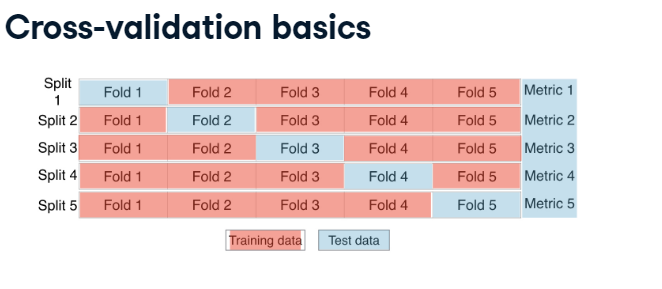

In [ ]:
# Function to fit classifiers and print cross validation scores
def clf_fit_score(clf, clf_name):
    clf.fit(X_train, y_train)
    train_score, test_score, cv_score = round(clf.score(X_train, y_train),4), round(clf.score(X_test, y_test),4), round(cross_val_score(clf, X_train, y_train, cv=5).mean(),4)
    print('Classifier name : {}%'.format(clf_name))
    print('Training set accuracy: {}%'.format(train_score*100))
    print('5-set cross validation accuracy: {}%'.format(cv_score*100))
    print('-'*50)

In [ ]:
# LogisticRegression 
lr = LogisticRegression(solver='liblinear')
clf_fit_score(lr, 'Logistic Regression')

In [ ]:
# K Nearest Classifier 
knn = KNN()
clf_fit_score(knn, 'K Nearest Classifier')

In [ ]:
# Decision Tree Classifier
dt = DecisionTreeClassifier()
clf_fit_score(dt, 'Decision Tree Classifier')

In [ ]:
# RandomForest Classifier
rf = RandomForestClassifier(random_state=123)
clf_fit_score(dt, 'Decision Tree Classifier')

In [ ]:
# RandomForest Classifier
gbt = GradientBoostingClassifier(random_state=123)
clf_fit_score(gbt, 'Gradient Boosting Classifier') 

## Hyperparameter Tuning

Below is the result of 5-fold cross validation accuracy score for models we have tested with default setting:

* Logistic Regression : 70.85%
* KNearest Classifier : 66.99%
* Decision Tree Classifier : 64.66%
* Random Forest Classifier : 64.11%
* Gradient Boosting Classifier : 72.02%

Is there any way for us to improve this score? - This is when hyperparameter tuning comes in

**What is hyperparameter?**

Hyperparameter is an external configuration on the model often specified by the user, to fine-tune various part of the model for better prediction.

We will have to test multiple set of values on the same model to identify which set of hyperparameter provides us with the best result.

In [ ]:
# Hyperparameter tuning for LogisticRegression
lr_param = {'C':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.1]}
lr = LogisticRegression(solver='liblinear')
search = GridSearchCV(lr, lr_param) # by default, 5-cv
search.fit(X_train, y_train)

print("Best CV params", search.best_params_)
print("Best CV accuracy", search.best_score_)

In [ ]:
# Hyperparameter tuning for KNearestClassifier
knn_param = {'n_neighbors':np.arange(1,15)}
knn = KNN()
search = GridSearchCV(knn, knn_param) # by default, 5-cv
search.fit(X_train, y_train)

print("Best CV params", search.best_params_)
print("Best CV accuracy", search.best_score_)

In [ ]:
# Hyperparameter tuning for DecisionTreeClassifier
dt_param = {'max_depth':[5,10,15,20,50,100,None], 'min_samples_leaf':[0.001, 0.005, 0.01, 0.05, 0.1]}
dt = DecisionTreeClassifier()
search = GridSearchCV(dt, dt_param) # by default, 5-cv
search.fit(X_train, y_train)

print("Best CV params", search.best_params_)
print("Best CV accuracy", search.best_score_)

In [ ]:
# Hyperparameter tuning for RandomForestClassifier
rf_param = {'max_depth':[2,5,10], 'n_estimators':[100,300]}
rf = RandomForestClassifier(n_jobs = -1, random_state=123)
search = GridSearchCV(rf, rf_param) # by default, 5-cv
search.fit(X_train, y_train)

print("Best CV params", search.best_params_)
print("Best CV accuracy", search.best_score_)

In [ ]:
# Hyperparameter tuning for GradientBoostingClassifier
gbt_param = {'n_estimators':[50, 100, 200], 'max_depth':[3, 5, 10]}
gbt = GradientBoostingClassifier(random_state=123)
search = GridSearchCV(gbt, gbt_param) # by default, 5-cv
search.fit(X_train, y_train)

print("Best CV params", search.best_params_)
print("Best CV accuracy", search.best_score_)

**Accuracy result after hyperparameter tuning**

We saw overall marginal increase in cross validation accruacy score.

* Logistic Regression : 71.15%
* KNearest Classifier : 68.83%
* Decision Tree Classifier : 69.88%
* Random Forest Classifier : 71.90%
* Gradient Boosting Classifier : 72.09%


## What is missing?

**Accuracy**

My gradient Boosting classifier had the accuracy of 72.09% on cross validation accruacy. However, for the dataset of this size with binary classfication problem, there is a plenty of room for improvement. If I were to come back to this notebook for future edits, I plan to improve this accuracy by:

* Experiement with feature engineering by using different set of categorical and/or continuous features 
* Evaluate the magnitude of influence of each variables (ex. 'l1' versus 'l2' penalty) 
* Analyze the dataset for additional feature/feature combinations with predictor values
* Optimize the balance between bias and variance (overfitting versus underfitting)  
* Experiement with wider range of tuned hyperparmaeters, which includes, but are not limited to, types of penalities and etc.

**Evaluating the model**

Accuracy is not the only means to measure the performance/quality of classification models. Additional elements to consider include, but are not limited to:

* Evaluation of confusion matrix, precision, recall, f1 score, etc. 
* Evaluation of receiver operating characteristic curve, specifically the area under
* Evaluation of classifciation threshold
